<a href="https://colab.research.google.com/github/victoriamaina/Financial-Inclusion/blob/main/FINANCIAL_INCLUSION_IN_AFRICA_DATA_ANALYSIS_by_VICTORIA_MAINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

**FINANCIAL INCLUSION IN AFRICA DATA ANALYSIS**

**Problem of statement**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. 13.9% of the adult population in east Africa have access to or use a commercial bank account which is such a low number. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth and development. Due to the lack of financial infrastructure many under-served and low-income communities suffer. Thus, a need to figure out which individuals are most likely to have or use a bank account. This will provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda

**Objectives**

•	To find number of people with and without banks 

•	To find out between males and female who are more likely to have banks

•	What are some of the factors could led to one having a bank account or doesn’t have a bank account?
1.	Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question



## 1.0 Importing Libraries

In [48]:
# Importing Pandas
# 
import pandas as pd

In [49]:
# Importing Numpy
#
import numpy as np

In [50]:
# Importing Seaborn
#
import seaborn as sns

In [51]:
# Importing Matplotlib
#
import matplotlib.pyplot as plt

##LOADING THE DATASET 

In [52]:
finance_dataset=pd.read_csv("/content/Financial Dataset - 1.csv")


In [53]:
##Previewing first 5rows
finance_dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [54]:
#previewing last 5 rows
finance_dataset.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [55]:
#CHECKING FOR INFO
finance_dataset.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [56]:
finance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [57]:
finance_dataset.shape

(23524, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


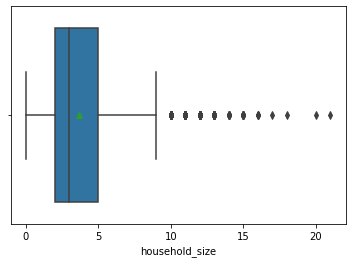

In [58]:
##checking for outliers
sns.boxplot(finance_dataset["household_size"],showmeans=True)

the following are outliers but will not remove them coz they are actual numbers that a household have.

In [59]:
##checking for missing data
finance_dataset.isnull().sum().sort_values(ascending=False)

Has a Bank account        36
gender_of_respondent      34
Respondent Age            34
marital_status            32
Type of Job               30
Level of Educuation       29
household_size            28
Type of Location          15
country                   14
Cell Phone Access         11
The relathip with head     4
uniqueid                   0
year                       0
dtype: int64

In [60]:
# filling missing value using fillna()  
finance_dataset.fillna(0)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [61]:
#Dropping null values
finance_dataset1=finance_dataset.dropna(how='any')

In [62]:
finance_dataset1.shape

(23343, 13)

In [63]:
finance_dataset1.isnull().sum().sort_values(ascending=False)

Type of Job               0
Level of Educuation       0
marital_status            0
The relathip with head    0
gender_of_respondent      0
Respondent Age            0
household_size            0
Cell Phone Access         0
Type of Location          0
Has a Bank account        0
uniqueid                  0
year                      0
country                   0
dtype: int64

In [64]:
finance_dataset1=finance_dataset1.rename(columns={'Type of Job':'Type_of_Job','Level of Educuation':'Level_of_Educuation','The relathip with head':'The_relathip_with_head','Respondent Age':'Respondent_Age','Cell Phone Access':'Cell_Phone_Access','Type of Location':'Type_of_Location','Has a Bank account':'Has_a_Bank_account'},inplace=False)
finance_dataset1

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 1.2 Exploratoy Data Analysis
Univariate Analysis
Categorical Variables

### 1.22 Bar Charts and Histograms

Text(0.5, 1.0, 'Relationship with head')

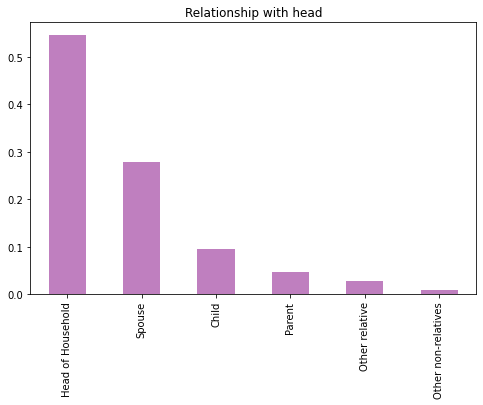

In [65]:
finance_dataset1.The_relathip_with_head.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.5, color = "purple", figsize=(8, 5))
plt.title("Relationship with head")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


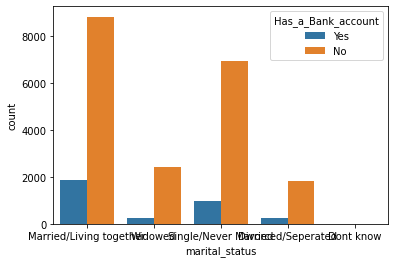

In [122]:
#Has bank accounts in regards to their marital status
sns.countplot('marital_status', hue= 'Has_a_Bank_account', data=finance_dataset1)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


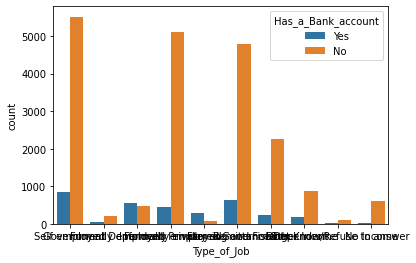

In [121]:
## Has a bank account in regards to their job
sns.countplot('Type_of_Job', hue= 'Has_a_Bank_account', data=finance_dataset1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


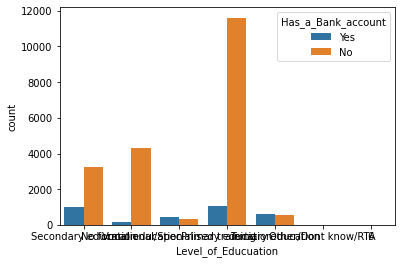

In [123]:
##Level of education with regards to whether their have or dont have bank accounts.
sns.countplot('Level_of_Educuation', hue= 'Has_a_Bank_account', data=finance_dataset1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


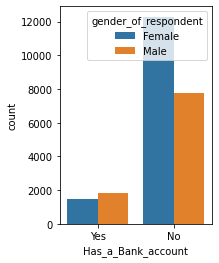

In [66]:
## Female and male with or without Bank Accounts
plt.subplot(1,2,1)
sns.countplot('Has_a_Bank_account',hue='gender_of_respondent',data=finance_dataset1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


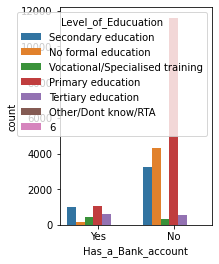

In [67]:
## Those with or without a Bank account with their levels of education.
plt.subplot(1,2,2)
sns.countplot('Has_a_Bank_account',hue='Level_of_Educuation',data=finance_dataset1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


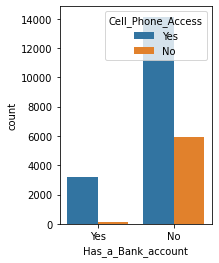

In [68]:
##Has a bank account and access to acell phone
plt.subplot(1,2,2)
sns.countplot('Has_a_Bank_account',hue='Cell_Phone_Access',data=finance_dataset1)

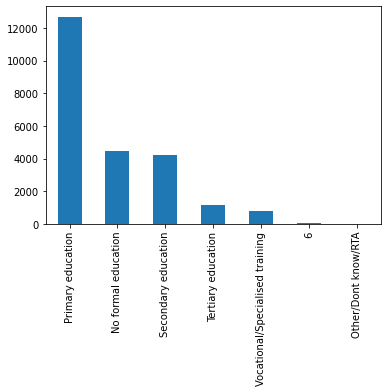

In [69]:
#Level of education distribution frequency
finance_dataset1['Level_of_Educuation'].value_counts().plot.bar()

a bar chart to show number of male and female with and without bank accounts

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


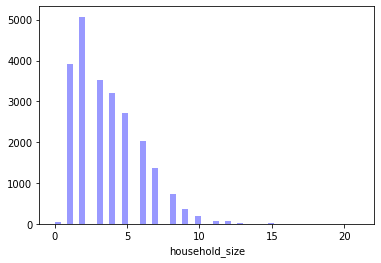

In [70]:

sns.distplot(finance_dataset1['household_size'],kde=False,color='blue')

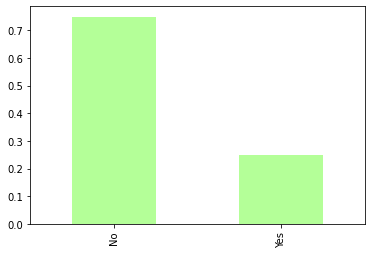

In [71]:
finance_dataset1.Has_a_Bank_account[(finance_dataset1.country == "Kenya")].value_counts(normalize = True).plot(kind = "bar", alpha = 0.5,color = "#6BFF33")

## 1.3 Numerical Variables

### 1.31 Measures of Central Tendency

In [72]:
# Example 1: Mean
# Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. 
# In a way, it is a single number which can estimate the value of whole data set.
# ---
# Finding the mean the household size
finance_dataset1["household_size"].mean()

3.6886432763569377

In [73]:
# ---
# Finding the average mean of the respondents age
finance_dataset1["Respondent_Age"].mean()

38.80550914621085

In [74]:
# Example 3: Mode 
# Mode is the term appearing maximum time in data set i.e. term that has highest frequency.
# ---
# Finding the median
finance_dataset["marital_status"].mode()

0    Married/Living together
dtype: object

### 1.32 Measures of Dispersion/Variability/Spread

In [75]:
# Example 1: Standard Deviation  
# Standard deviation is the measurement of average distance between each quantity and mean. 
# That is, how data is spread out from mean. A low standard deviation indicates that the data points 
# tend to be close to the mean of the data set, while a high standard deviation indicates that the 
# data points are spread out over a wider range of values.
# There are situations when we have to choose between sample or population Standard Deviation. 
# When we are asked to find SD of some part of a population, a segment of population; 
# then we use sample Standard Deviation. But when we have to deal with a whole population, 
# then we use population Standard Deviation. As you know, in descriptive statistics, 
# we generally deal with a data available in a sample, not in a population.
# ---
# Finding the standard deviation
finance_dataset1['Respondent_Age'].std()


16.51980349804178

In [76]:
finance_dataset1['household_size'].std()

2.2811835250351495

In [77]:
# Example 2: Variance
# Variance is a square of average distance between each quantity and mean. 
# That is it is square of standard deviation. It is a measure of how dispersed or spread out the set is, 

# Finding the variance of the respondent age
finance_dataset1['Respondent_Age'].var()

272.90390761391353

In [78]:
# Finding the variance of the respondent age
finance_dataset1['household_size'].var()

5.20379827489179

In [79]:
# 
# Question: Determine the skewness of the household size

# Determining the skeweness
finance_dataset1["household_size"].skew()

0.9741086837897069

In [80]:
# Example 7: Displaying the summary statistics of the dataframe
#
finance_dataset1['household_size'].describe()


count    23343.000000
mean         3.688643
std          2.281184
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

BIVARIATE ANALYSIS

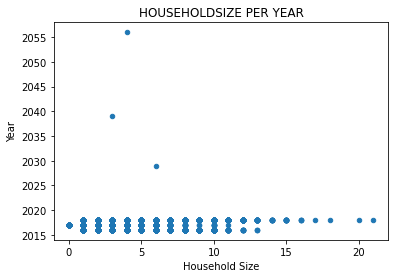

In [81]:
# Using Pandas: Plotting our scatterplot to compare the variables
finance_dataset1.plot(x = 'household_size', y = 'year', kind='scatter')
# Giving our scatterplot a title
plt.title('HOUSEHOLDSIZE PER YEAR')

# Labelling our x axis
plt.xlabel('Household Size')

# Labelling our y axis
plt.ylabel('Year')

# We then display our scatterplot as shown below
plt.show()


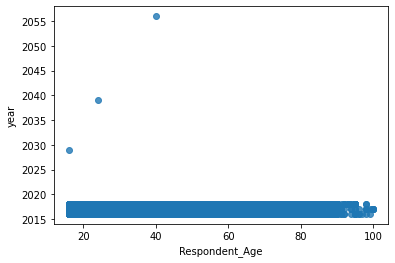

In [82]:
#  Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x =finance_dataset1["Respondent_Age"], y = finance_dataset1["year"], fit_reg=False)


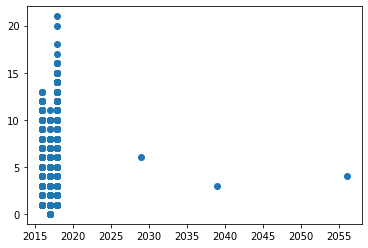

In [83]:
# Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(finance_dataset1["year"] , finance_dataset1["household_size"])

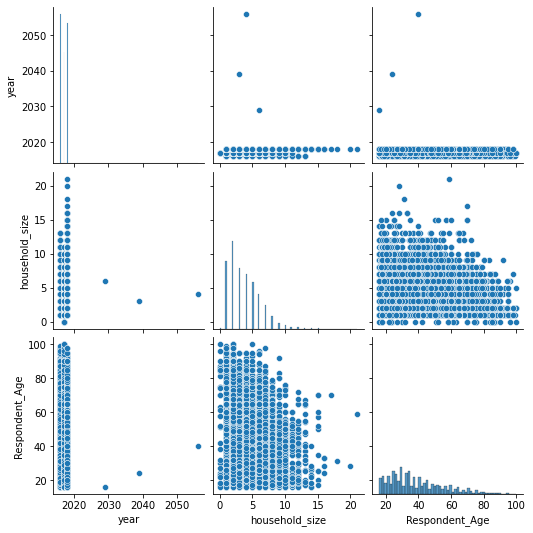

In [84]:
sns.pairplot(finance_dataset1)

In [85]:
##Correlation 
#
finance_dataset1['Respondent_Age'].corr(finance_dataset1['household_size'])

-0.11970919507762415

We have a negative correlation .Which means if increase the respondent age the household size decreases

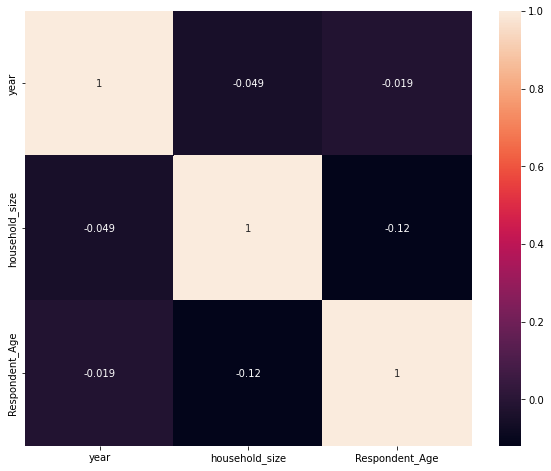

In [86]:
plt.figure(figsize=(10, 8))

vg_corr = finance_dataset1.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

<Figure size 720x720 with 0 Axes>

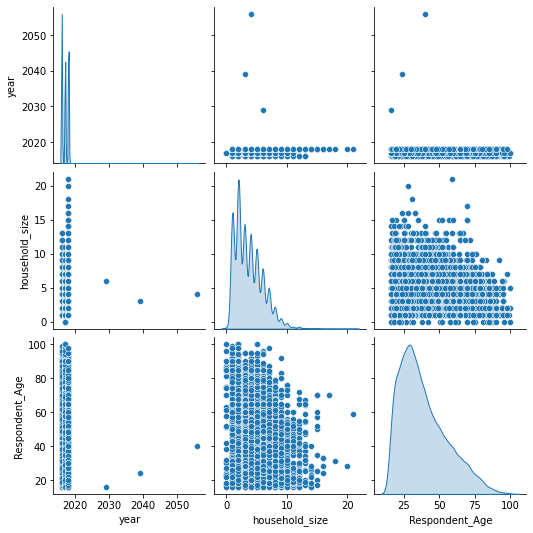

In [87]:
plt.figure(figsize=(10, 10))

sns.pairplot(finance_dataset1, diag_kind='kde');

MULTIVARIANT ANALYSIS

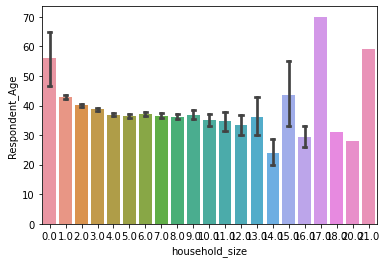

In [101]:
sns.barplot(x="household_size", y="Respondent_Age", data=finance_dataset1, capsize=.2 )

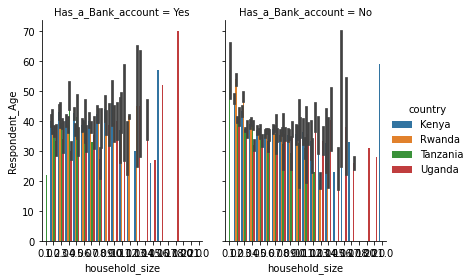

In [108]:
sns.catplot(x="household_size",y="Respondent_Age", hue="country", col="Has_a_Bank_account",data=finance_dataset1, kind="bar",height=4, aspect=.7);

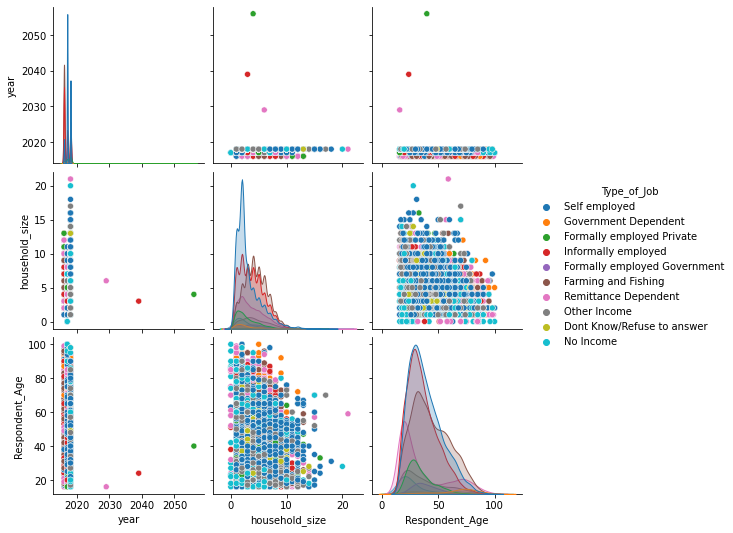

In [124]:
sns.pairplot(finance_dataset1, hue="Type_of_Job")